# Lab 2 – Community Detection
Name: Ngô Văn Trung Nguyên

StudentID: 20127054

---

## Self evaluation

|No.|Criteria|Evaluation rate (%)|
|--------|--------|---------|
|1| Explore at least 2 of the algorithms |100%|
|2| Execute the code and running examples |100%|  
|3| Search at least 2 large size datasets and implement the algorithms on these datasets |100%| 
|4| Compare algorithms |50%| 
|5| Full and detailed report of the implementation process, source code. Clear presentation, reasonable layout. Organize files into folders that show what each group means like source, report, test, etc. |100%| 

- Problems: CPM is an overlapping community deetection, so it cannot use modularity and partition_quality function built-in Networkx. So i can only aplly these metrics on Girvan-Newman algorithm.

---

# Community detection

Community detection is the process of finding groups of closely connected nodes within a network. These groups are called communities, and they represent substructures within the network that are more connected to each other than to the rest of the network.

---

## Import librabries

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

from networkx.algorithms.community.quality import partition_quality
from networkx.algorithms.community.quality import modularity
import time

---

# 1. Girvan-Newman algorithm

## Explore
The Girvan-Newman algorithm (named after Michelle Girvan and Mark Newman) is a well-known algorithm for community detection in complex systems.

The Girvan-Newman algorithm is based on the idea of edge betweenness centrality, which measures the number of shortest paths between pairs of nodes in the network that pass through a given edge. The edges with high edge betweenness are often the edges that connect different communities in a network. The Girvan-Newman algorithm works by iteratively removing these edges to separate the groups from the others.

<b>Girvan-Newman algorithm's steps for community detection:</b>
1. Calculate the betweenness centrality of every edge in the network.
2. Remove the edge(s) with the highest betweenness centrality.
3. Recalculate the betweenness centrality for every remaining edges.
4. Repeat steps 2–3 until there are no more edges left.

Each time an edge is removed, the network is split into two or more connected components, each of which represents a potential community. The algorithm continues until all edges have been removed (or until the desired number of communities has been found).

**Advantages:**
- Simple and easy-to-implement
- Flexible, easy to adapt to different type of networks and community detection

**Disadvantages:**
- Computationally expensive, especially for large networks.

## How to calculate edge betweeness centrality

- Step 1: Run BFS on a random node A.
- Step 2: Determine the number of shortest paths from A to each other vertex
- Step 3: Based on the result in step 2, determine the edge betweenness centrality of all edges from A.
- Step 4: Choose another unchosen node and repeat steps 2-3.

## Example

- Using Girvan-Newman algorithm for this graph

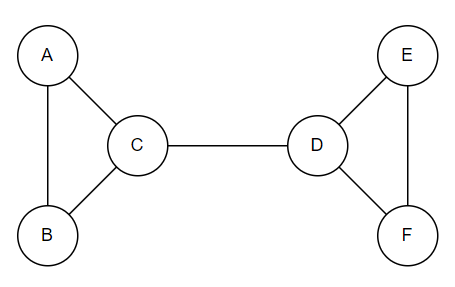

- Using BFS on vertex A:

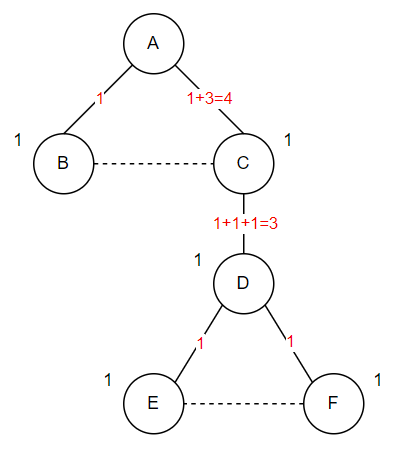

- Using BFS on vertex B:

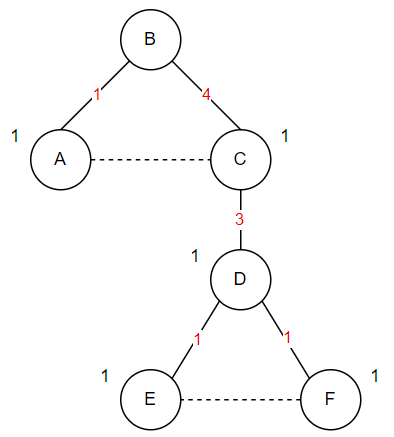

- Using BFS on vertex C:

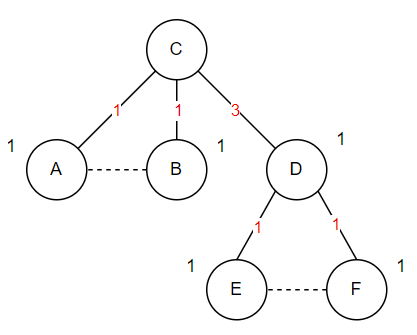

- Using BFS on vertex D:

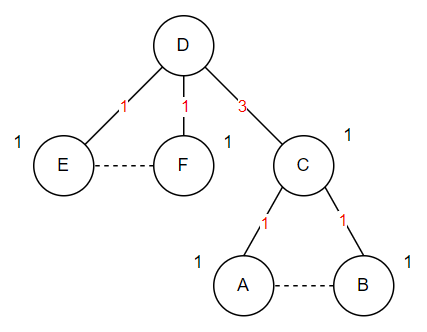

- Using BFS on vertex E:

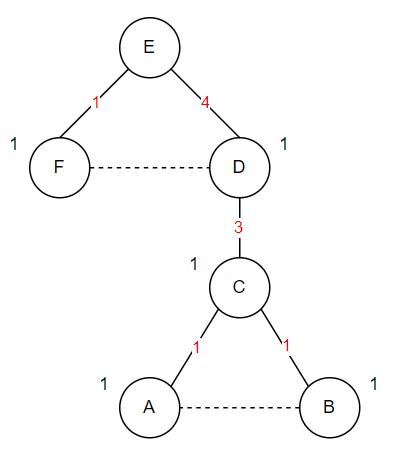

- Using BFS on vertex F:

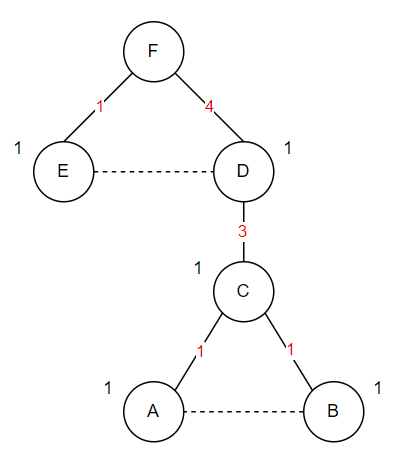

- After knowing edge betweenness centrality from all nodes (A,B,C,D,E,F), we sum all of them and since edges are bi-directional, betweenness centrality will be reduced in half.

| Edge  | Sum | Edge betweenness centrality |
|-------|---------------------------------------|------|
|  AB   | 1 + 1 = 2 |**1**|
|  AC   | 4 + 1 + 1 + 1 + 1 = 8 |**4**|
|  BC   | 4 + 1 + 1 + 1 + 1 = 8 |**4**|
|  CD   | 3 + 3 + 3 + 3 + 3 + 3 = 18 |**9**|
|  DE   | 4 + 1 + 1 + 1 + 1 = 8 |**4**|
|  DF   | 4 + 1 + 1 + 1 + 1 = 8 |**4**|
|  EF   | 1 + 1 = 2 |**1**|

- From the table, we see that CD has the highest value of edge betweeness centrality. Therefore, we delete this edge and get 2 connected components.

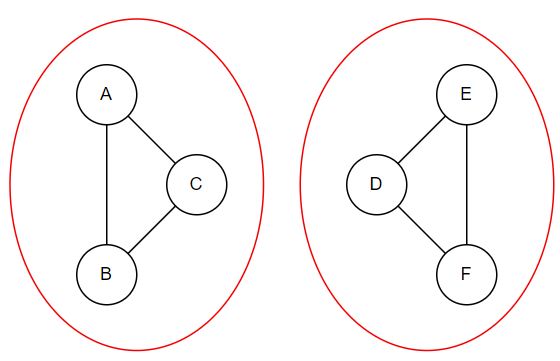

- Recalculate edge betweeness centrality

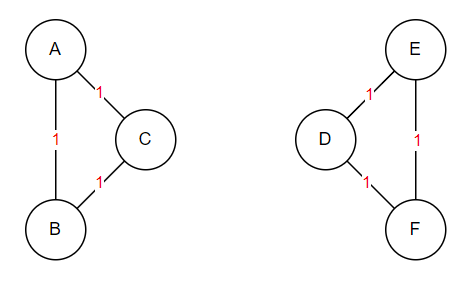

- We see that all edges now have the same betweenness centrality. We can stop here or continue calculating and removing edges until there are no edges left. But we should better stop here.

## Execute the code and running examples

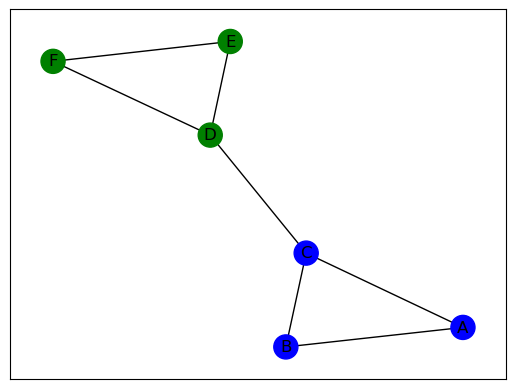

Number of communities:  2
Communities:  [['A', 'C', 'B'], ['F', 'E', 'D']]


In [13]:
G = nx.Graph() #create an empty graph
G.add_nodes_from(['A','B','C','D','E','F']) #Add nodes
G.add_edges_from([('A','B'), ('A','C'), ('B','C'), ('C','D'), ('D','E'), ('D','F'), ('E','F')]) #Add edges

communities = girvan_newman(G) #use girvan_newman algorithm
node_groups = [] #list to save communities
for com in next(communities):
    node_groups.append(list(com))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue') #color of 1st community
    else:
        color_map.append('green') #color of 2nd community
nx.draw_networkx(G, node_color=color_map, with_labels=True)
plt.show()

print("Number of communities: ", len(node_groups))
print("Communities: ", node_groups)

---

# 2. Clique percolation

## Explore
Clique percolation is a community detection algorithm that is designed to identify overlapping communities in a network. It operates under the assumption that edges within a community are more likely to form cliques, while edges between different communities are less likely to form cliques. 

A clique is a complete graph and a k-clique is a complete graph with k vertices. Larger values of k lead to fewer and larger communities, while smaller values of k lead to more and smaller communities.

**Clique percolation steps:**
1. Find all k-clique in the network.
2. Build a graph where each node corresponds to a k-clique, and two nodes are connected if the corresponding k-cliques overlap in k-1 nodes. Each connected componets represents a community in a network.

**Advantages:**
- The algorithm can identify overlapping communities, which is important in many real-world networks where nodes can belong to multiple communities.
- The algorithm is able to handle noisy or incomplete data without significantly compromising the quality or reliability of the results.
- Flexible, the algorithm is capable of identifying communities that vary in size and shape.

**Disadvantages:**
- Computationally expensive, especially for large networks and large values of k.

## Example

- Applying Clique percolation to dectect communities on this network:

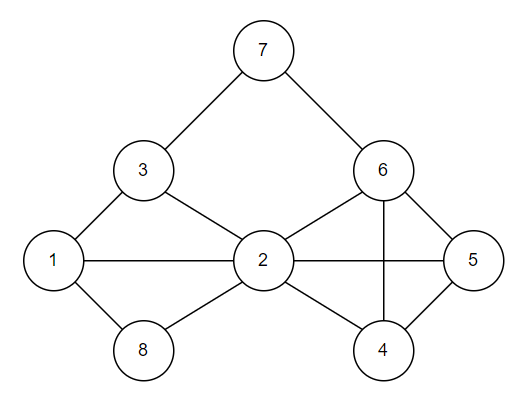

- We will use k = 3 for this example. There re 6 3-cliques:

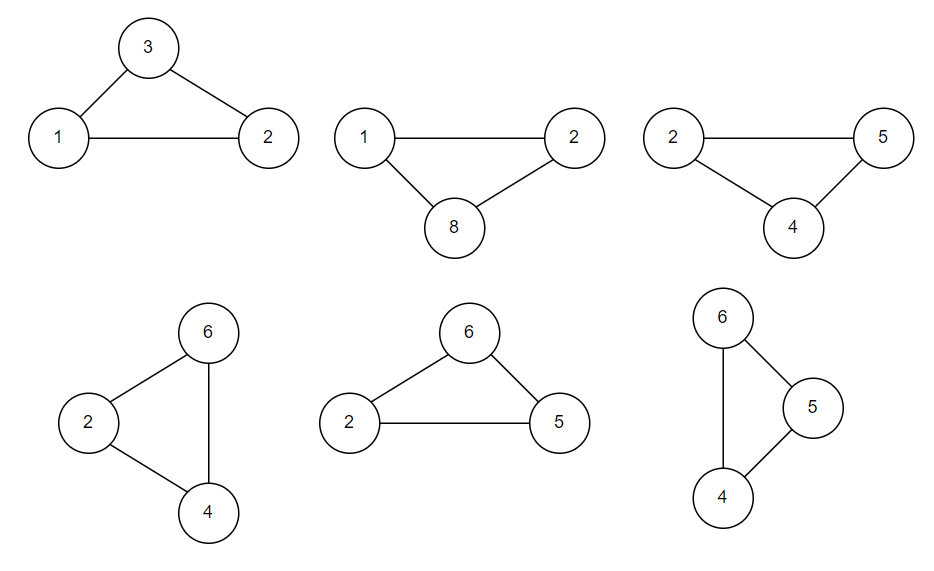

- a: 1,2,3
- b: 1,2,8
- c: 2,4,5
- d: 2,4,6
- e: 2,5,6
- f: 4,5,6

- Clique a and clique b: they have two common node 1 and 2. So clique a and clique b form a community.

- Clique c and clique d: they have two common node 2 and 4. So clique c nd clique d are connected.
- Clique d and clique e: they have two common node 2 and 6. So clique d nd clique e are connected.
- Clique e and clique f: they have two common node 5 and 6. So clique e nd clique f are connected.
- Clique c and clique e: they have two common node 2 and 5. So clique c nd clique e are connected.
- Clique d and clique f: they have two common node 4 and 6. So clique d nd clique f are connected.
- Clique c and clique f: they have two common node 4 and 5. So clique c nd clique f are connected.

- Therefore, we have 2 communities: a, b and c, d, e, f.

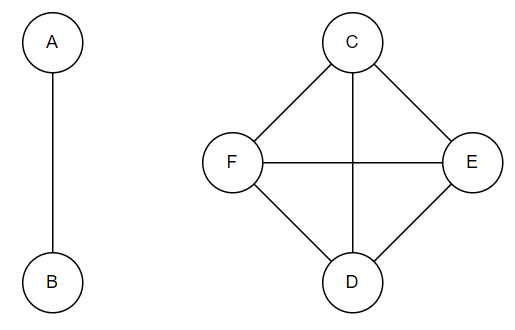

## Execute the code and running examples

Number of communities:  2
Communities:  [[1, 2, 3, 8], [2, 4, 5, 6]]
Red is common node. Grey is not in any communities


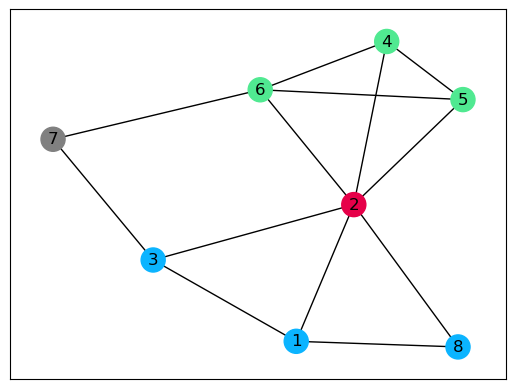

In [14]:
G = nx.Graph() #create an empty graph
G.add_nodes_from([1,2,3,4,5,6,7,8]) #Add nodes
G.add_edges_from([(1,3), (1,8), (1,2), (2,3), (2,8), (2,6), (2,5), (2,4), (5,6), (5,4), (4,6), (7,3), (7,6)]) #Add edges

communities = list(nx.community.k_clique_communities(G, 3)) #Use clique percolation method

print("Number of communities: ", len(communities))
tmp_com = [list(x) for x in communities] # Change frozeset to list for printing
print("Communities: ", tmp_com)

color_set = ["#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"] #Create a color set for visualize each community

color_map = {}
for i, com in enumerate(communities): #set color for each node
    for node in com:
        color_map[node] = color_set[i]
        
common_nodes = set.intersection(*[set(com) for com in communities])
for node in common_nodes: #If a npde is a common node, it is red
    color_map[node] = '#e60049'

for node in G: #If a node is not in any communities, it is grey
    if node not in list(color_map.keys()):
        color_map[node] = '#808080'

colors = [color_map[key] for key in sorted(color_map.keys())] #change dict to list in order

print("Red is common node. Grey is not in any communities")
nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=colors, with_labels=True)
plt.show()

---

# Large dataset

## 1. Coauthorships in network science

### Describe

Link download: http://www-personal.umich.edu/~mejn/netdata/netscience.zip

This dataset is about a coauthorship network of scientists working on network theory and experiment, as compiled by M. Newman in May 2006
- Number of vertices: 1589
- Number of edges: 2742

Using comunity detection for this dataset can help us see some interesting patterns in the network, such as subfields within network theory and experiment, or groups of scientists who frequently collaborate across different institutions or countries.

In [15]:
netscience_graph = nx.read_gml('netscience.gml', label='id')
print("Number of vertices:", netscience_graph.number_of_nodes())
print("Number of edges:", netscience_graph.number_of_edges())

Number of vertices: 1589
Number of edges: 2742


### Girvan-Newman algorithm

In [16]:
start_time = time.time()

GirvanNewman_netscience = girvan_newman(netscience_graph)
gn_netscience_node_groups = []
for com in next(GirvanNewman_netscience):
    gn_netscience_node_groups.append(list(com))

running_time = time.time() - start_time

print("Execution time: ", running_time)
print("Number of communities: ", len(gn_netscience_node_groups))
print("Communities: ", gn_netscience_node_groups)

Execution time:  11.470397233963013
Number of communities:  397
Communities:  [[0, 1, 946, 1084], [2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 1424, 1425, 1532], [12, 13, 14, 15, 1047, 1048, 1049, 1050], [16, 17, 18], [19], [20, 21, 22], [200, 201, 202, 369, 23, 24, 25], [26], [27, 28, 29], [1024, 1025, 1030, 1549, 1550, 1551, 1039, 1040, 30, 31, 32, 33, 34, 547, 546, 548, 549, 550, 44, 45, 46, 561, 562, 51, 52, 53, 54, 55, 56, 57, 58, 77, 78, 79, 80, 590, 589, 595, 596, 591, 592, 90, 609, 610, 1123, 611, 612, 1121, 1122, 1130, 1135, 1136, 1137, 1138, 114, 113, 120, 121, 641, 131, 132, 133, 134, 646, 1162, 1163, 652, 653, 654, 655, 656, 657, 1172, 1180, 1181, 1189, 1190, 1191, 1195, 1196, 685, 1197, 184, 185, 186, 190, 191, 192, 193, 194, 1228, 1229, 1239, 1255, 1263, 756, 759, 760, 761, 762, 763, 764, 765, 774, 775, 776, 265, 266, 262, 268, 263, 264, 1295, 267, 269, 276, 277, 278, 1312, 1313, 1314, 1315, 1316, 305, 306, 307, 308, 309, 1347, 1348, 326, 327, 840, 839, 328, 329, 1361, 1362, 1363, 

- Execution time: 12.136 (s)
- Number of communities: 397

### Clique percolation method

In [17]:
start_time = time.time()

CPM_netscience = list(nx.community.k_clique_communities(netscience_graph, 3))
tmp_netscience_com = [list(x) for x in CPM_netscience]

running_time = time.time() - start_time

print("Execution time:", running_time)
print("Number of communities: ", len(CPM_netscience))
print("Communities: ", tmp_netscience_com)

Execution time: 0.015986919403076172
Number of communities:  260
Communities:  [[0, 1, 1084], [2, 3, 4, 5, 6], [9, 10, 11, 7], [1424, 9, 1425], [1047, 1048, 1049, 1050, 12], [12, 13, 14, 15], [16, 17, 18], [20, 21, 22], [200, 201, 202, 369, 23, 24, 25], [27, 28, 29], [32, 30, 31], [131, 132, 133, 134, 839, 840, 1228, 1229, 1550, 1551, 30, 33, 34, 1190, 1191, 488, 489, 1008, 561, 562, 51, 52, 53, 54, 1529], [33, 1295, 1263, 375, 376, 377, 378], [33, 507, 508, 509, 190], [35, 36, 37, 38, 39, 40], [44, 45, 46], [609, 610, 611, 612, 45], [1361, 1362, 428, 46], [192, 193, 194, 46, 191], [48, 49, 50, 47], [1282, 1283, 516, 473, 1041, 788, 343, 216, 217, 218, 219, 220, 221, 222, 345, 224, 346, 347, 1560, 1561, 48, 1394, 1395, 1396, 1397, 697, 1145, 251, 252], [774, 652, 653, 654, 655, 656, 657, 184, 865, 34, 547, 934, 1130, 51, 1461, 55, 56, 893], [57, 58, 51], [59, 60, 61], [64, 65, 1566, 1567, 1562, 1563, 1564, 1565, 62, 63], [805, 806, 807, 808, 362, 1070, 1071, 1072, 1073, 1016, 62], [64,

- Execution time: 0.0175 (s)
- Number of communities: 260

## 2. Infectious SocioPatterns

### Describe

Link download: http://www.sociopatterns.org/files/datasets/001/INFECTIOUS_cumulative_daily_networks.tar.gz

This dataset includes daily cumulative networks from the Infectious SocioPatterns visualization. It contains 69 gml files representing each of the covered days. Nodes in the graph represent Science Gallery visitors, and edges represent face-to-face proximity. Edge weights correspond to the number of 20-second intervals of detected proximity.Note that the same node IDs are used for simplicity, but they correspond to different visitors on each day. Therefore i am going to use only 1 file for 1 day.

I am using the newest day file in this dataset (2009-07-17)

- Number of vertices: 332
- Number of edges: 1781

Applying community detection on this dataset can help us identify subgroups of visitors who frequently interact with each other, such as groups of friends or colleagues, or visitors who attend the Science Gallery on a regular basis.

In [18]:
infectious_graph = nx.read_gml('cumulative_2009-07-17.gml', label='id')
print("Number of vertices:", infectious_graph.number_of_nodes())
print("Number of edges:", infectious_graph.number_of_edges())

Number of vertices: 332
Number of edges: 1781


### Girvan-Newman algorithm

In [19]:
start_time = time.time()

GirvanNewman_infectious = girvan_newman(infectious_graph)
gn_infectious_node_groups = []
for com in next(GirvanNewman_infectious):
    gn_infectious_node_groups.append(list(com))

running_time = time.time() - start_time

print("Running time:", running_time)
print("Number of communities: ", len(gn_infectious_node_groups))
print("Communities: ", gn_infectious_node_groups)

Running time: 10.149776220321655
Number of communities:  6
Communities:  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 149, 150, 151, 152, 153, 154, 155, 156, 161, 162, 167, 168, 169], [145, 147, 148, 157, 158, 159, 160, 163, 164, 165, 166, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207

- Execution time: 10.396 (s)
- Number of communities: 6

### Clique percolation

In [20]:
start_time = time.time()

CPM_infectious = list(nx.community.k_clique_communities(infectious_graph, 3))
tmp_infectious_com = [list(x) for x in CPM_infectious]

running_time = time.time() - start_time

print("Execution time:", running_time)
print("Number of communities: ", len(CPM_infectious))
print("Communities: ", tmp_infectious_com)

Execution time: 0.05977988243103027
Number of communities:  8
Communities:  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 166, 173, 174, 175, 176, 178, 179, 180, 181, 186, 187, 189, 190, 191, 192, 193, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 216, 217, 218, 219, 220, 221], [80, 85, 71, 78], [137, 162, 161], [148, 171, 172, 173], [178, 16

- Execution time: 0.051 (s)
- Number of communities: 8

## Results

- Netscience:

|Algorithm|Execution time (second)|Number of communities|
|---------|-------------------------------|------------|
|Girvan-Newman Algorithm |12.136|397|
|Clique Percolation Method|0.0175|260 (k = 3)|

- Infectious:

|Algorithm|Execution time (second)|Number of communities|
|---------|-------------------------------|------------|
|Girvan-Newman Algorithm |10.396|6|
|Clique Percolation Method|0.051|8 (k = 3)|

We can easily notice that the execution time of CPM is significant faster than Girvan-Newman

---

# Compare algorithms

For measurement, we can use measures that are already included in Networkx, such as *Modularity* and *Partition Quality*.

- **Modularity**: To measure the strength of a network partition into communities.It measures the density of edges within communities compared to the expected density of edges in a random network with the same degree distribution. A higher modularity score indicates a better partition, where communities are more densely connected internally than with the rest of the network.
- **Partition Quality**: Returns the coverage and performance of a partition of graph. The coverage of a partition measures how many edges within a community are compared to the total number of edges in the graph (calculated as a ratio). The performance of a partition is based on the number of edges within a community and the number of non-edges between communities, divided by the total number of potential edges in the graph.

### Girvan-Newman algorithm

netscience_graph

In [21]:
GirvanNewman_netscience = girvan_newman(netscience_graph)
gn_netscience_node_groups = []
for com in next(GirvanNewman_netscience):
    gn_netscience_node_groups.append(list(com))


modularity_score = modularity(netscience_graph, gn_netscience_node_groups, weight='weight', resolution=1)
print('Modularity of Girvan-Newman Algorithm for netscience graph:', modularity_score)
print('Partition quality of Girvan-Newman Algorithm for netscience graph:', partition_quality(netscience_graph, gn_netscience_node_groups))

Modularity of Girvan-Newman Algorithm for netscience graph: 0.9297820700867823
Partition quality of Girvan-Newman Algorithm for netscience graph: (0.9985412107950401, 0.9701957570387091)


infectious_graph

In [22]:
GirvanNewman_infectious = girvan_newman(infectious_graph)
gn_infectious_node_groups = []
for com in next(GirvanNewman_infectious):
    gn_infectious_node_groups.append(list(com))

modularity_score = modularity(infectious_graph, gn_infectious_node_groups, weight='weight', resolution=1)
print('Modularity of Girvan-Newman Algorithm for infectious graph:', modularity_score)
print('Partition quality of Girvan-Newman Algorithm for infectious graph:', partition_quality(infectious_graph, gn_infectious_node_groups))

Modularity of Girvan-Newman Algorithm for infectious graph: 0.5619613160552587
Partition quality of Girvan-Newman Algorithm for infectious graph: (0.9865244244806288, 0.6633603902012886)


### Clique percolation

The measures of Modularity and Partition Quality are not applicable to overlapping communities. As a result, the CPM algorithm cannot utilize these metrics.

### Tables for Girvan-Newman comparison between 2 datasets

|Measurements|netscience|infectious|
|-------|----------------------|-------|
|Modularity|0.930|0.562|
|Partition quality|(0.999, 0.970)|(0.987, 0.663)|

We can say that Girvan-Newman is a slow algorithm. Overall Modularity and Partition quality of Girvan-Newman is good

---

# References

- Lecture slides
- https://memgraph.com/blog/community-detection-algorithms-with-python-networkx
- https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm
- https://www.youtube.com/watch?v=JxFf_oLRq9o
- https://www.youtube.com/watch?v=oG8KDaLMdWY
- https://en.wikipedia.org/wiki/Clique_percolation_method#:~:text=Definitions-,Clique%20Percolation%20Method%20(CPM),they%20share%20k%20%E2%88%92%201%20nodes
- https://medium.com/@sabadejuyee21/community-detection-through-clique-percolation-method-on-the-game-of-thrones-universe-b12efb188d99
- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html
- https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality
- https://en.wikipedia.org/wiki/Modularity_(networks)
- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html
- https://neo4j.com/docs/graph-data-science/current/algorithms/alpha/conductance/